In [196]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas.io.data as web

%matplotlib inline

In [201]:
# step 1: Range Selection
st = dt.datetime(2007,12,1)
en = dt.datetime(2016,1,1)
sp500_tickers_lil = ['AA','AAPL','ABC','ABT','ADBE','ADI','ADM','ADP','ADSK','AEE']
sp500_tickers_joey = ['AA','AAPL','ABC','ABT','ADBE','ADI','ADM','ADP','ADSK','AEE','AEP','AES','AET','AFL','AGN','AIG','AIV','AIZ','AKAM','ALL','AMAT','AMGN','AMP','AMT','AMZN','AN','ANTM','AON','APA','APC','APD','AVB','AVY','AXP','AZO','BA','BAC','BAX','BBBY','BBT','BBY','BCR','BDX','BEN','BFB','BHI','BIIB','BK','BLL','BMY','BRCM','BSX','BXP','C','CA','CAG','CAH','CAT','CB','CBG','CBS','CCE','CCL','CELG','CHK','CHRW','CI','CINF','CL','CLX','CMA','CMCSA','CME','CMI','CMS','CNP','CNX','COF','COH','COL','COP','COST','CPB','CSCO','CSX','CTAS','CTL','CTSH','CTXS','CVS','CVX','D','DD','DE','DFS','DGX','DHI','DHR','DIS','DOV','DOW','DRI','DTE','DUK','DVN','EA','EBAY','ECL','ED','EFX','EIX','EL','EMC','EMN','EMR','EOG','EQR','ESRX','ETFC','ETN','ETR','EXC','EXPD','EXPE','F','FCX','FDX','FE','FIS','FISV','FITB','FLR','FOXA','FTR','GAS','GD','GE','GILD','GIS','GLW','GME','GOOGL','GPC','GPS','GS','GT','GWW','HAL','HAR','HAS','HBAN','HD','HES','HIG','HOG','HON','HOT','HPQ','HRB','HST','HSY','HUM','IBM','ICE','IFF','INTC','INTU','IP','IPG','ITW','JCI','JEC','JNJ','JNPR','JPM','JWN','K','KEY','KIM','KLAC','KMB','KO','KR','KSS','L','LB','LEG','LEN','LH','LLL','LLTC','LLY','LM','LMT','LNC','LOW','LUK','LUV','M','MAR','MAS','MAT','MCD','MCHP','MCK','MCO','MDLZ','MDT','MET','MHFI','MKC','MMC','MMM','MO','MON','MRK','MRO','MS','MSFT','MSI','MTB','MU','MUR','MYL','NBL','NEE','NEM','NI','NKE','NOC','NOV','NSC','NTAP','NTRS','NUE','NVDA','NWL','OMC','ORCL','OXY','PAYX','PBI','PCAR','PCG','PCL','PCP','PDCO','PEG','PEP','PFE','PFG','PG','PGR','PH','PHM','PKI','PLD','PNC','PNW','POM','PPG','PPL','PRU','PSA','PX','QCOM','R','RAI','RF','RHI','RL','ROK','RRC','RTN','SBUX','SCHW','SE','SEE','SHW','SLB','SNA','SNDK','SO','SPG','SPLS','SRE','STI','STJ','STT','STZ','SWK','SYK','SYMC','SYY','T','TAP','TDC','TE','TGT','THC','TIF','TJX','TMK','TMO','TROW','TRV','TSN','TSO','TSS','TWX','TXN','TXT','UNH','UNM','UNP','UPS','USB','UTX','VAR','VFC','VIAB','VLO','VMC','VNO','VRSN','VZ','WAT','WBA','WFC','WFM','WHR','WM','WMB','WMT','WU','WY','WYN','XEL','XL','XLNX','XOM','XRX','YHOO','YUM','ZBH','ZION']

#options
jan = True

In [211]:
regr_coefs = []
k = 0

for ticker in sp500_tickers_lil:
    try:
        data = web.get_data_yahoo(ticker, start=st, end=en)
        k += 1
    except:
        print(ticker, "error")
        continue
        
    
    mdata = data.resample("M").pct_change().dropna()
    Y = mdata["Close"].values - np.mean(mdata["Close"].values)
    if jan:
        X = np.zeros([len(mdata["Close"].values),16]) # 1 constant + 12*mo + 1 2y + 1 3y + January
        X[0::12,-1] = 1
    else:
        X = np.zeros([len(mdata["Close"].values),15]) # 1 constant + 12*mo + 1 2y + 1 3y
    
    # constant
    X[:,-2] = 1
    
    X = pd.DataFrame(X)
    
    # monthly lags
    for x in range(12):
        X[x] = pd.Series(mdata["Close"]).shift(1+x).values
    
    # 24m lags
    X[12] = pd.Series(mdata["Close"]).shift(24).values
    
    # 36m lags
    X[13] = pd.Series(mdata["Close"]).shift(36).values
    
    # truncate
    X = X.ix[36:]
    Y = pd.DataFrame(Y).ix[36:]
    
    
    print("Ticker", ticker, "Regr. Start Date", mdata["Close"].index[36],"ndata",len(Y))
        
    result = sm.OLS(Y,X).fit()
    #print(result.summary())
    regr_coefs.append(result.params)
    
    '''
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(Y, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(Y, lags=40, ax=ax2)
    '''
    
#print("done")
avg_coefs = np.mean(np.array(regr_coefs),axis=0)
labels = ["1m","2m","3m","4m","5m","6m","7m","8m","9m","10m","11m","12m","24m","36m","const","Jan"]
for x in zip(labels, avg_coefs):
    print(x)

Ticker AA Regr. Start Date 2011-01-31 00:00:00 ndata 60
Ticker AAPL Regr. Start Date 2011-01-31 00:00:00 ndata 60
Ticker ABC Regr. Start Date 2011-01-31 00:00:00 ndata 60
Ticker ABT Regr. Start Date 2011-01-31 00:00:00 ndata 60
Ticker ADBE Regr. Start Date 2011-01-31 00:00:00 ndata 60
Ticker ADI Regr. Start Date 2011-01-31 00:00:00 ndata 60
Ticker ADM Regr. Start Date 2011-01-31 00:00:00 ndata 60
Ticker ADP Regr. Start Date 2011-01-31 00:00:00 ndata 60
Ticker ADSK Regr. Start Date 2011-01-31 00:00:00 ndata 60
Ticker AEE Regr. Start Date 2011-01-31 00:00:00 ndata 60
('1m', 0.10245248663911424)
('2m', -0.086612923766764952)
('3m', 0.022454565087886409)
('4m', -0.077100830601519246)
('5m', -0.034724116844600139)
('6m', -0.10236884192578435)
('7m', -0.10531474486409413)
('8m', -0.097140489890674753)
('9m', 0.047928020261961982)
('10m', -0.086512302251157316)
('11m', 0.017010351350307599)
('12m', -0.11741060122947862)
('24m', -0.085273815992315982)
('36m', -0.07728242088644352)
('const', 0.

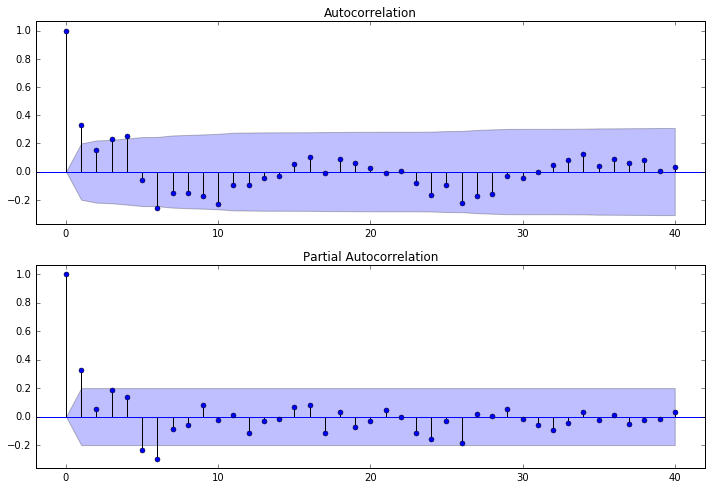

In [209]:
data = web.get_data_yahoo("AA", start=st, end=en)
mdata = data.resample("M").pct_change().dropna()
Y = mdata["Close"].values - np.mean(mdata["Close"].values)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Y, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Y, lags=40, ax=ax2)
plt.show()